In [55]:
import sys

sys.path.append("..")

In [56]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.constants import hbar, m_e, eV, epsilon_0, e, physical_constants
from scipy.sparse.linalg import eigsh
from scipy.linalg import eigh, eig
import src.fem_1d_eigen
import importlib
from src.fem_1d_eigen import *

importlib.reload(src.fem_1d_eigen)

<module 'src.fem_1d_eigen' from '/home/yamamoto/physics/fem/fem_schrodinger/examples/../src/fem_1d_eigen.py'>

In [57]:
R = physical_constants["Bohr radius"][0]

In [58]:
xs = np.linspace(1e-20, 1e-9, 1000)
x_centers = (xs[1:] + xs[:-1]) / 2
v = -1 / x_centers
femeig = Fem1dEigen(xs)
K0 = femeig.get_K0()
M = femeig.get_M()
K1 = femeig.get_K1(v)
K0_dirichlet = K0[1:-1, 1:-1]
M_dirichlet = M[1:-1, 1:-1]
K1_dirichlet = K1[1:-1, 1:-1]
k = 3
C0 = hbar**2 / (m_e)
C1 = e**2 / (4 * np.pi * epsilon_0)
val, vec = eigsh(
    -1 / 2 * C0 * K0_dirichlet + C1 * K1_dirichlet,
    k=k,
    M=M_dirichlet,
    which="LA",
    sigma=-20 * eV,
)

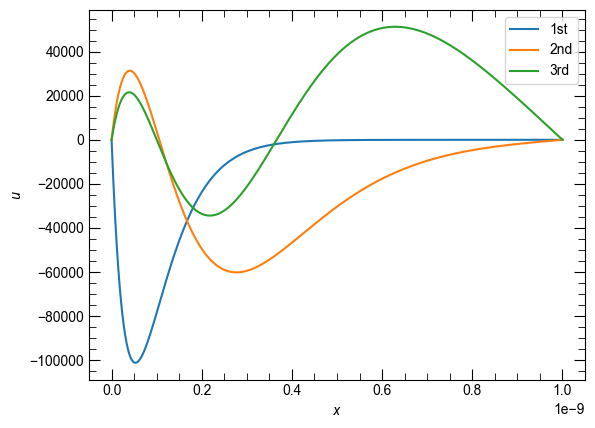

In [59]:
vec_0 = np.insert(vec, 0, 0, axis=0)
vec_0_m1 = np.insert(vec_0, vec_0.shape[0], 0, axis=0)
fig, ax = plt.subplots()
ax.plot(xs, vec_0_m1[:, 0], label="1st")
ax.plot(xs, vec_0_m1[:, 1], label="2nd")
ax.plot(xs, vec_0_m1[:, 2], label="3rd")
ax.legend()
ax.set_xlabel("$x$")
ax.set_ylabel("$u$")
fig.savefig("eigenfunction.pdf")

In [60]:
val / eV

array([-13.61559793,  -3.40174998,  -1.29091805])

In [61]:
val

array([-2.18145929e-18, -5.45020433e-19, -2.06827874e-19])

In [71]:
vals = []
part1 = np.arange(10, 100, 10)
part2 = np.arange(100, 1000, 100)
part3 = np.arange(1000, 5000, 1000)
combined = np.concatenate((part1, part2, part3))
for i in combined:
    print(i)
    xs = np.linspace(1e-15, 1e-9, i)
    x_centers = (xs[1:] + xs[:-1]) / 2
    vs = -1 / x_centers
    femeig = Fem1dEigen(xs)
    K0 = femeig.get_K0()
    M = femeig.get_M()
    K1 = femeig.get_K1(vs)
    K0_dirichlet = K0[1:-1, 1:-1]
    M_dirichlet = M[1:-1, 1:-1]
    K1_dirichlet = K1[1:-1, 1:-1]
    val, vec = eigsh(
        -1 / 2 * C0 * K0_dirichlet + C1 * K1_dirichlet,
        k=1,
        M=M_dirichlet,
        which="LM",
        sigma=-20 * eV,
    )
    vals.append(val)

10
20
30
40
50
60
70
80
90
100
200
300
400
500
600
700
800
900
1000


2000
3000
4000


In [72]:
Ry = physical_constants["Rydberg constant times hc in eV"][0]
err = np.abs(-Ry - np.array(vals) / eV) / (Ry)
err

array([[2.85615195e-01],
       [6.45381880e-02],
       [1.85794242e-03],
       [2.26746461e-02],
       [2.83227914e-02],
       [2.86007072e-02],
       [2.69926440e-02],
       [2.48181696e-02],
       [2.25896859e-02],
       [2.05001142e-02],
       [8.87063168e-03],
       [4.91826900e-03],
       [3.14382675e-03],
       [2.18977801e-03],
       [1.61433793e-03],
       [1.23872726e-03],
       [9.79030122e-04],
       [7.91440621e-04],
       [6.51191245e-04],
       [1.46498555e-04],
       [3.36296844e-05],
       [9.96323824e-06]])

[1.]


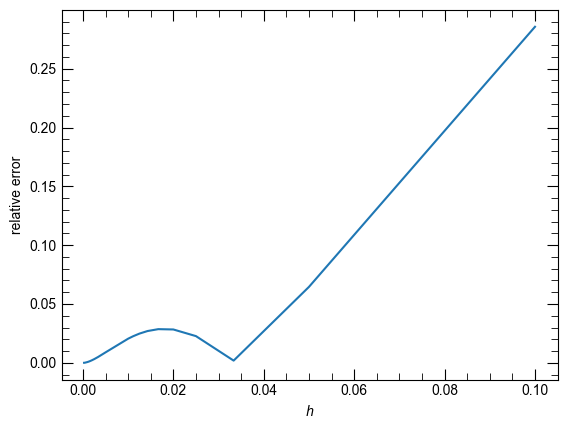

In [73]:
fig, ax = plt.subplots()
ax.plot(1 / combined, err)
ax.set_xlabel("$h$")
ax.set_ylabel("relative error")
print((np.pi**2 - vals[-1]) / (np.pi**2))
fig.savefig("convergence.pdf")

[1.]


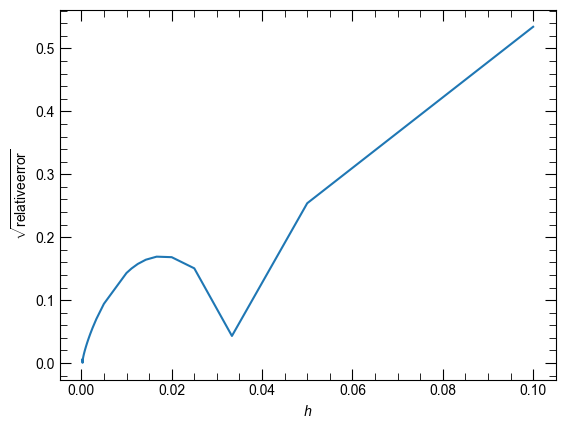

In [ ]:
fig, ax = plt.subplots()
ax.plot(1 / combined, np.sqrt(err))
ax.set_xlabel("$h$")
ax.set_ylabel(r"$\sqrt{\mathrm{relative error}}$")
print((np.pi**2 - vals[-1]) / (np.pi**2))
fig.savefig("figs/convergence_sqrt.pdf")

In [ ]:
1 / combined, np.abs(-Ry - np.array(vals) / eV) / (Ry)

(array([0.1       , 0.05      , 0.03333333, 0.025     , 0.02      ,
        0.01666667, 0.01428571, 0.0125    , 0.01111111, 0.01      ,
        0.005     , 0.00333333, 0.0025    , 0.002     , 0.00166667,
        0.00142857, 0.00125   , 0.00111111, 0.001     , 0.00090909,
        0.00083333, 0.00076923, 0.00071429, 0.00066667, 0.000625  ,
        0.00058824, 0.00055556, 0.00052632, 0.0005    , 0.00047619,
        0.00045455, 0.00043478, 0.00041667, 0.0004    , 0.00038462,
        0.00037037, 0.00035714, 0.00034483, 0.00033333, 0.00032258,
        0.0003125 , 0.00030303, 0.00029412, 0.00028571, 0.00027778,
        0.00027027, 0.00026316, 0.00025641, 0.00025   , 0.0002439 ,
        0.0002381 , 0.00023256, 0.00022727, 0.00022222, 0.00021739,
        0.00021277, 0.00020833, 0.00020408]),
 array([[2.85615195e-01],
        [6.45381880e-02],
        [1.85794242e-03],
        [2.26746461e-02],
        [2.83227914e-02],
        [2.86007072e-02],
        [2.69926440e-02],
        [2.48181696e-02]